In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [75]:
df = pd.read_csv('/Users/ronitguptaaa/Documents/Excel Analysis/UserData/User_data.csv')

In [76]:
df = df.drop(columns=['Unnamed: 0'], axis=1)

In [77]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [78]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

df['Gender_Male'] = df['Gender_Male'].map({True: 1, False: 0})

In [79]:
df

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [81]:
X1 = df.drop(['Purchased'], axis=1)

In [82]:
X1.shape

(400, 4)

In [83]:
y = df['Purchased']

In [84]:
y = y.values.reshape(-1,1)

In [85]:
y.shape

(400, 1)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.1)

In [87]:
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/ronitguptaaa/opt/anaconda3/envs/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [90]:
y_pred = model.predict(X1)

In [91]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,

In [92]:
df['Predicted Purchase'] = y_pred

In [94]:
df['Purchased'] = df['Purchased'].map({1:True, 0:False})

In [95]:
df['Predicted Purchase'] = df['Predicted Purchase'].map({1:True, 0:False})

In [97]:
df['Gender']=df['Gender_Male']

In [100]:
df=df.drop('Gender_Male',axis=1)

In [102]:
df['Gender']=df['Gender'].map({1:'Male', 0:'Female'})

In [105]:
accuracy = accuracy_score(y, y_pred)

In [106]:
accuracy   

0.8425

In [107]:
cm = confusion_matrix(y, y_pred)

In [111]:
cm

array([[235,  22],
       [ 41, 102]])

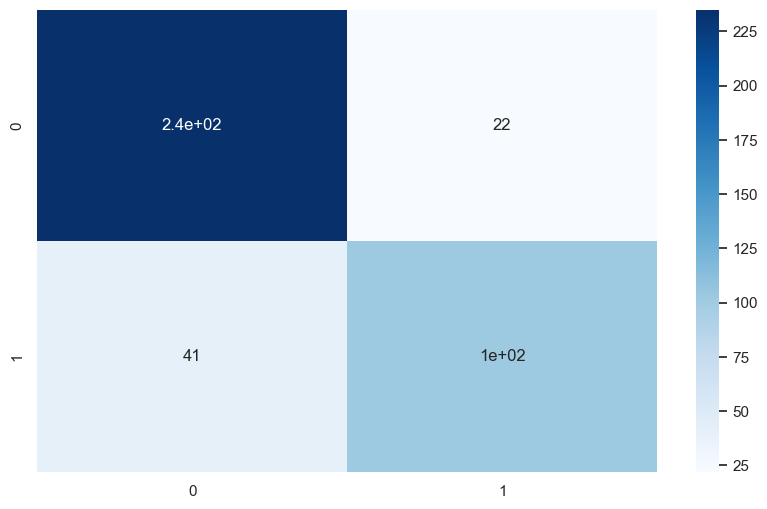

In [109]:
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()